# Task-2 : UNEMPLOYEMENT ANALYSIS WITH PYTHON

Name: ANN MARIA JOSMON

Dataset used : Unemployment_Rate_upto_11_2020.csv

**Importing Libraries :**

In [265]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as ps
%matplotlib inline

In [266]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [267]:
df.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [268]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


**Data Preprocessing**

1. Data Cleaning :

In [270]:
df.isnull().sum() #Checking for NULL values

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [271]:
df = df.fillna(df.mean()) # Fill missing values with the mean
     

C:\Users\JOSMON\AppData\Local\Temp\ipykernel_1572\2565669675.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [272]:
df = df.drop_duplicates([' Date', 'Region'])  # Remove Duplicate Entries
     

In [273]:
df = df.drop_duplicates()

In [274]:
# Convert the 'Date' column to datetime format
df[' Date'] = pd.to_datetime(df[' Date'])

In [275]:
# Set the 'Date' column as the index
df.set_index(' Date', inplace=True)

In [276]:
df.shape

(267, 8)

2. Data reshaping

In [277]:
df.tail(2)

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,
2020-09-30,West Bengal,M,9.35,35707239,47.73,East,22.9868,87.855
2020-10-31,West Bengal,M,9.98,33962549,45.63,East,22.9868,87.855


In [278]:
df.rename(columns={'Region': 'State'}, inplace=True) # Renaming the 'Region' Column to 'State' Column

In [279]:
df.tail(2)

,State,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,
2020-09-30,West Bengal,M,9.35,35707239,47.73,East,22.9868,87.855
2020-10-31,West Bengal,M,9.98,33962549,45.63,East,22.9868,87.855


In [280]:
# Calculate average unemployment rate by state
average_unemployment_rate = df.groupby('State')[' Estimated Unemployment Rate (%)'].mean()


State with HIGHEST unployment rate

In [281]:
# Find the state with the highest unemployment rate
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

In [282]:
print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Haryana
Highest unemployment rate: 27.476999999999997


State with LOWEST unemployment rate

In [283]:
# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()
     

In [305]:
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 3.8659999999999997


**Data Visualization:**

a. Line plot showing unemployment rate over time:

In [314]:
df = df[~df.index.duplicated(keep='first')]


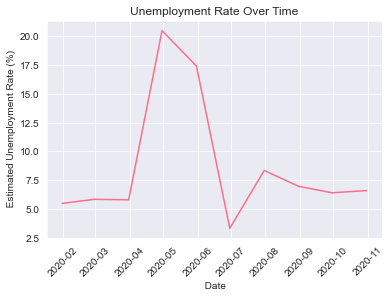

In [315]:
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time')
plt.show()     

b. Bar plot displaying average unemployment rate by state:


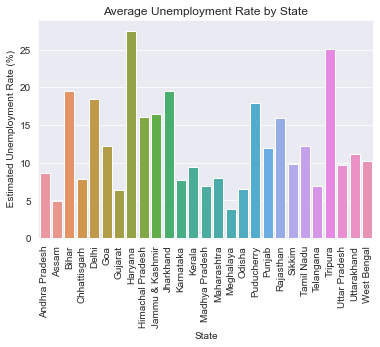

In [316]:

state_avg_unemployment = un_emp_11_20.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()
sns.barplot(x='State', y=' Estimated Unemployment Rate (%)', data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by State')
plt.show()

In [317]:
df.columns

Index(['State', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

c. Scatter plot showing the relationship between unemployment rate and labor participation rate:

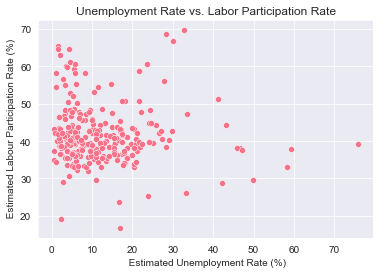

In [318]:


sns.scatterplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Labour Participation Rate (%)', data=un_emp_11_20)
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show()
     

d. Histogram of Unemployment Rate Distribution:

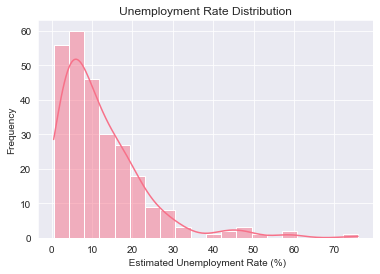

In [319]:
sns.histplot(un_emp_11_20[' Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel(' Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Unemployment Rate Distribution')
plt.show()

e1. Area Plot of Labor Participation Rate Over Time by State :

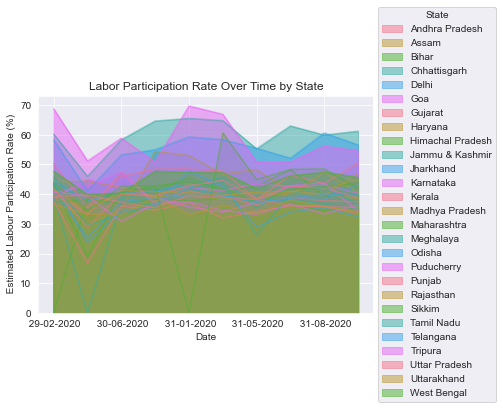

In [320]:


state_area_labor_participation = un_emp_11_20.pivot(index=' Date', columns='State', values=' Estimated Labour Participation Rate (%)')
state_area_labor_participation.plot(kind='area', stacked=False, alpha=0.5)
plt.xlabel('Date')
plt.ylabel(' Estimated Labour Participation Rate (%)')
plt.title('Labor Participation Rate Over Time by State')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

e2. Area Plot of Labor Participation Rate Over Time by Region :

f. Heatmap of Correlation Matrix:

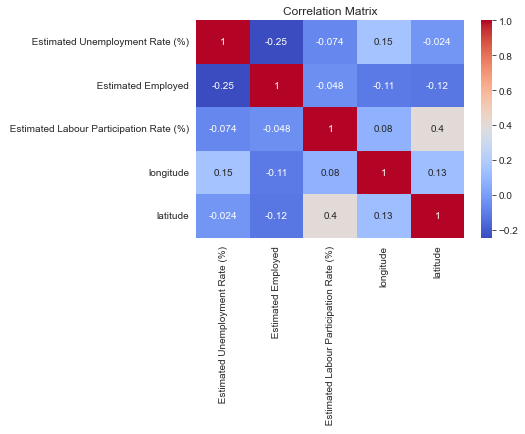

In [299]:
correlation_matrix = un_emp_11_20.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()